In [1]:
!pip install tensorflow

Lightweight MIDI Music Generation for Assignment

1. PREPROCESSING...
Processing MIDI files...
Using random sample of 30 files for faster training
Found 30 MIDI files
Processed 10/30 files
Processed 20/30 files
Processed 30/30 files
Extracted 9251 notes from 30 files
Vocabulary size: 44 (MIDI range: 36-84)
Created 769 training sequences

2. TRAINING...
Lightweight model built successfully!
Total parameters: 112,748


/Users/ishetabansal/Documents/CSE253/Assignment2/venv/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
/Users/ishetabansal/Documents/CSE253/Assignment2/venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 25, 64)         │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 44)             │         2,860 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,748 (440.42 KB)

 Trainable params: 112,748 (440.42 KB)

 Non-trainable params: 0 (0.00 B)

None
Starting lightweight training...
Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0614 - loss: 3.6032 - val_accuracy: 0.1121 - val_loss: 3.2823 - learning_rate: 0.0100
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1369 - loss: 2.9875 - val_accuracy: 0.1466 - val_loss: 2.9002 - learning_rate: 0.0100
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1612 - loss: 2.6720 - val_accuracy: 0.1121 - val_loss: 2.7352 - learning_rate: 0.0100
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1854 - loss: 2.5277 - val_accuracy: 0.1552 - val_loss: 2.6501 - learning_rate: 0.0100
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2164 - loss: 2.3447 - val_accuracy: 0.1897 - val_loss: 2.4443 - learning_rate: 0.0100
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2853 - loss: 2.1917 - val_accuracy: 0.2672 - val_loss: 2.3139 - learning_rate: 0.0100
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3406 

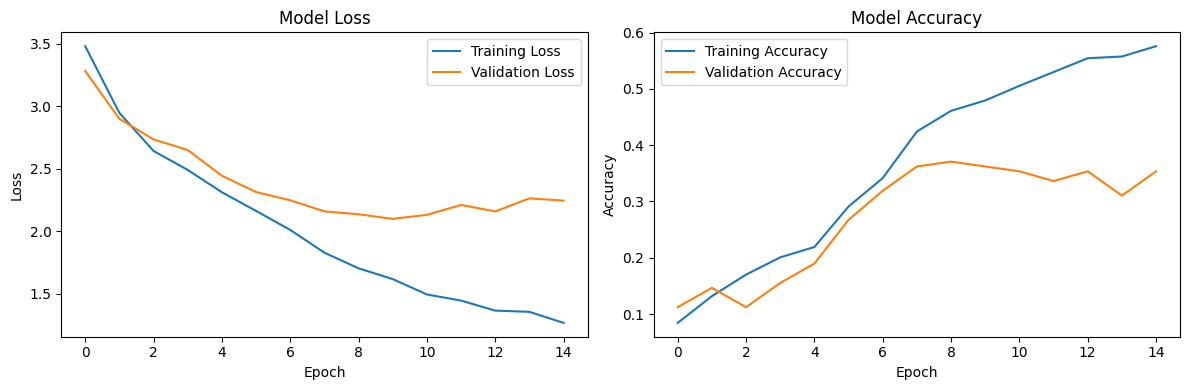

Model data saved to lightweight_midi_lstm_data.pkl

3. GENERATING MUSIC...
Generating 180 notes...
Generated 0/180 notes...
Generated 50/180 notes...
Generated 100/180 notes...
Generated 150/180 notes...
Music generation completed!
MIDI file saved as symbolic_unconditioned2.mid
Generating 60 notes...
Generated 0/60 notes...
Generated 50/60 notes...
Music generation completed!
MIDI file saved as generated_music_short2.mid

✅ Lightweight music generation completed!
📁 Files generated:
   - symbolic_unconditioned.mid (for assignment submission)
   - generated_music_short.mid (test sample)
   - lightweight_midi_lstm.h5 (trained model)

📊 Statistics:
   - Training samples: 769
   - Vocabulary size: 44
   - Model parameters: 112,748
   - Training epochs: 15


In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import glob
import pickle
import random
import matplotlib.pyplot as plt
from collections import Counter

# For MIDI processing
try:
    import pretty_midi
except ImportError:
    print("Installing pretty_midi...")
    import subprocess
    subprocess.check_call(["pip", "install", "pretty_midi"])
    import pretty_midi

# Set random seeds for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

class LightweightMidiLSTM:
    def __init__(self, sequence_length=25, embedding_dim=64, lstm_units=128, 
                 dropout_rate=0.2, max_notes=1000):
        """Lightweight LSTM for faster training"""
        self.sequence_length = sequence_length  # Reduced from 50
        self.embedding_dim = embedding_dim      # Reduced from 256
        self.lstm_units = lstm_units           # Reduced from 512
        self.dropout_rate = dropout_rate
        self.max_notes = max_notes             # Limit notes per file
        
        self.model = None
        self.vocab_size = None
        self.note_to_int = {}
        self.int_to_note = {}
        
    def preprocess_midi_files(self, midi_dir_path, max_files=50):
        """Extract notes from MIDI files with limits for faster processing"""
        print("Processing MIDI files...")
        
        # Get MIDI files
        midi_files = glob.glob(f"{midi_dir_path}/*.mid") + glob.glob(f"{midi_dir_path}/*.midi")
        
        # Limit number of files for faster processing
        if len(midi_files) > max_files:
            midi_files = random.sample(midi_files, max_files)
            print(f"Using random sample of {max_files} files for faster training")
        
        print(f"Found {len(midi_files)} MIDI files")
        
        notes = []
        processed_files = 0
        
        for file_path in midi_files:
            try:
                midi = pretty_midi.PrettyMIDI(file_path)
                file_notes = []
                
                # Extract notes from all instruments
                for instrument in midi.instruments:
                    if not instrument.is_drum:
                        for note in instrument.notes:
                            # Simplified note representation: just pitch
                            file_notes.append(note.pitch)
                
                # Limit notes per file
                if len(file_notes) > self.max_notes:
                    file_notes = file_notes[:self.max_notes]
                
                notes.extend(file_notes)
                processed_files += 1
                
                if processed_files % 10 == 0:
                    print(f"Processed {processed_files}/{len(midi_files)} files")
                    
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue
        
        print(f"Extracted {len(notes)} notes from {processed_files} files")
        return notes
    
    def create_vocabulary(self, notes):
        """Create simplified note vocabulary"""
        # Filter to common MIDI range (36-84) for smaller vocabulary
        filtered_notes = [note for note in notes if 36 <= note <= 84]
        
        unique_notes = sorted(set(filtered_notes))
        self.vocab_size = len(unique_notes)
        
        self.note_to_int = {note: i for i, note in enumerate(unique_notes)}
        self.int_to_note = {i: note for i, note in enumerate(unique_notes)}
        
        print(f"Vocabulary size: {self.vocab_size} (MIDI range: {min(unique_notes)}-{max(unique_notes)})")
        return filtered_notes
    
    def create_sequences(self, notes):
        """Create training sequences"""
        # Convert notes to integers
        note_ints = [self.note_to_int.get(note, 0) for note in notes if note in self.note_to_int]
        
        # Create sequences
        sequences = []
        targets = []
        
        # Use smaller step size for more training data
        step_size = self.sequence_length // 2
        
        for i in range(0, len(note_ints) - self.sequence_length, step_size):
            sequence = note_ints[i:i + self.sequence_length]
            target = note_ints[i + self.sequence_length]
            sequences.append(sequence)
            targets.append(target)
        
        print(f"Created {len(sequences)} training sequences")
        
        X = np.array(sequences)
        y = tf.keras.utils.to_categorical(targets, num_classes=self.vocab_size)
        
        return X, y
    
    def build_model(self):
        """Build lightweight LSTM model"""
        model = keras.Sequential([
            # Smaller embedding layer
            keras.layers.Embedding(
                input_dim=self.vocab_size,
                output_dim=self.embedding_dim,
                input_length=self.sequence_length
            ),
            
            # Single LSTM layer (instead of multiple)
            keras.layers.LSTM(
                self.lstm_units,
                dropout=self.dropout_rate,
                recurrent_dropout=self.dropout_rate
            ),
            
            # Smaller dense layer
            keras.layers.Dense(self.lstm_units // 2, activation='relu'),
            keras.layers.Dropout(self.dropout_rate),
            keras.layers.Dense(self.vocab_size, activation='softmax')
        ])
        
        # Use simpler optimizer settings
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.01),  # Higher LR for faster training
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        # Build the model explicitly before calling count_params
        model.build(input_shape=(None, self.sequence_length))
        
        self.model = model
        print("Lightweight model built successfully!")
        print(f"Total parameters: {model.count_params():,}")
        print(model.summary())
        
        return model

    def train_model(self, X, y, epochs=20, batch_size=128, validation_split=0.2):
        """Train with settings optimized for speed"""
        print("Starting lightweight training...")
        
        # Callbacks for faster training
        callbacks = [
            keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=5,  # Reduced patience
                restore_best_weights=True
            ),
            keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.7,
                patience=3,
                min_lr=1e-6
            )
        ]
        
        # Train the model
        history = self.model.fit(
            X, y,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=validation_split,
            callbacks=callbacks,
            verbose=1
        )
        
        # Plot training history
        self.plot_training_history(history)
        
        return history
    
    def plot_training_history(self, history):
        """Plot training metrics"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Plot loss
        ax1.plot(history.history['loss'], label='Training Loss')
        ax1.plot(history.history['val_loss'], label='Validation Loss')
        ax1.set_title('Model Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        
        # Plot accuracy
        ax2.plot(history.history['accuracy'], label='Training Accuracy')
        ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax2.set_title('Model Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
    
    def generate_music(self, num_notes=200, temperature=1.0, seed_sequence=None):
        """Generate music sequence"""
        if self.model is None:
            raise ValueError("Model not trained yet!")
        
        # Create seed sequence
        if seed_sequence is None:
            # Start with random notes from vocabulary
            seed_sequence = np.random.choice(
                list(self.int_to_note.keys()), 
                size=self.sequence_length
            )
        
        generated_notes = []
        current_sequence = list(seed_sequence)
        
        print(f"Generating {num_notes} notes...")
        
        for i in range(num_notes):
            # Prepare input
            input_sequence = np.array(current_sequence[-self.sequence_length:]).reshape(1, -1)
            
            # Predict next note
            prediction = self.model.predict(input_sequence, verbose=0)[0]
            
            # Apply temperature
            prediction = np.log(prediction + 1e-7) / temperature
            prediction = np.exp(prediction) / np.sum(np.exp(prediction))
            
            # Sample next note
            next_note_int = np.random.choice(len(prediction), p=prediction)
            next_note = self.int_to_note[next_note_int]
            
            generated_notes.append(next_note)
            current_sequence.append(next_note_int)
            
            if i % 50 == 0:
                print(f"Generated {i}/{num_notes} notes...")
        
        print("Music generation completed!")
        return generated_notes
    
    def notes_to_midi(self, notes, output_file='generated_music.mid', tempo=120):
        """Convert notes to MIDI file"""
        # Create a PrettyMIDI object
        midi = pretty_midi.PrettyMIDI(initial_tempo=tempo)
        
        # Create an instrument (piano)
        piano = pretty_midi.Instrument(program=1)
        
        # Add notes
        current_time = 0.0
        note_duration = 0.5  # Default duration
        
        for pitch in notes:
            note = pretty_midi.Note(
                velocity=80,
                pitch=int(pitch),
                start=current_time,
                end=current_time + note_duration
            )
            piano.notes.append(note)
            current_time += note_duration
        
        midi.instruments.append(piano)
        midi.write(output_file)
        print(f"MIDI file saved as {output_file}")
    
    def save_model_data(self, filepath='lightweight_midi_lstm_data.pkl'):
        """Save model data"""
        data = {
            'note_to_int': self.note_to_int,
            'int_to_note': self.int_to_note,
            'vocab_size': self.vocab_size,
            'sequence_length': self.sequence_length,
            'embedding_dim': self.embedding_dim,
            'lstm_units': self.lstm_units,
            'dropout_rate': self.dropout_rate
        }
        
        with open(filepath, 'wb') as f:
            pickle.dump(data, f)
        print(f"Model data saved to {filepath}")

# Main function optimized for speed
def main():
    print("=" * 60)
    print("Lightweight MIDI Music Generation for Assignment")
    print("=" * 60)
    
    # Initialize lightweight model
    midi_lstm = LightweightMidiLSTM(
        sequence_length=25,    # Reduced for speed
        embedding_dim=64,      # Much smaller
        lstm_units=128,        # Much smaller
        dropout_rate=0.2,      # Less aggressive dropout
        max_notes=500          # Limit notes per file
    )
    
    # 1. PREPROCESSING (with limits for speed)
    print("\n1. PREPROCESSING...")
    notes = midi_lstm.preprocess_midi_files(
        "nottingham-dataset/MIDI", 
        max_files=30  # Limit files for faster processing
    )
    
    # Create vocabulary
    filtered_notes = midi_lstm.create_vocabulary(notes)
    
    # Create training sequences
    X, y = midi_lstm.create_sequences(filtered_notes)
    
    # 2. TRAINING (reduced epochs for speed)
    print("\n2. TRAINING...")
    midi_lstm.build_model()
    
    # Quick training with fewer epochs
    history = midi_lstm.train_model(
        X, y, 
        epochs=15,        # Reduced from 100
        batch_size=128,   # Larger batch for speed
        validation_split=0.15
    )
    
    # Save model
    midi_lstm.model.save('lightweight_midi_lstm.h5')
    midi_lstm.save_model_data()
    
    # 3. GENERATION
    print("\n3. GENERATING MUSIC...")
    
    # Generate for assignment submission
    generated_notes_90sec = midi_lstm.generate_music(
        num_notes=180,  # ~90 seconds at 120 BPM
        temperature=0.8
    )
    
    # Save as MIDI for assignment
    midi_lstm.notes_to_midi(
        generated_notes_90sec, 
        'symbolic_unconditioned2.mid',  # Assignment filename
        tempo=120
    )
    
    # Generate a shorter sample for testing
    generated_notes_short = midi_lstm.generate_music(
        num_notes=60,
        temperature=1.0
    )
    
    midi_lstm.notes_to_midi(
        generated_notes_short, 
        'generated_music_short2.mid',
        tempo=120
    )
    
    print("\n✅ Lightweight music generation completed!")
    print("📁 Files generated:")
    print("   - symbolic_unconditioned.mid (for assignment submission)")
    print("   - generated_music_short.mid (test sample)")
    print("   - lightweight_midi_lstm.h5 (trained model)")
    
    # Display some statistics
    print(f"\n📊 Statistics:")
    print(f"   - Training samples: {len(X):,}")
    print(f"   - Vocabulary size: {midi_lstm.vocab_size}")
    print(f"   - Model parameters: {midi_lstm.model.count_params():,}")
    print(f"   - Training epochs: {len(history.history['loss'])}")

if __name__ == "__main__":
    main()


In [3]:
!pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.1-cp39-cp39-macosx_10_9_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.1-cp39-cp39-macosx_10_9_universal2.whl (2.7 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [matplotlib]5 [matplotlib]


#########
EVALUATION PROTOCOL

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def evaluate_statistics(note_sequence, title="Generated Sequence"):
    print(f"Evaluating {title}")
    
    # Pitch range
    min_pitch = min(note_sequence)
    max_pitch = max(note_sequence)
    print(f"Pitch Range: {min_pitch} to {max_pitch}")
    
    # Pitch histogram
    pitch_counts = Counter(note_sequence)
    sorted_pitches = sorted(pitch_counts.keys())
    frequencies = [pitch_counts[p] for p in sorted_pitches]
    
    plt.figure(figsize=(12, 4))
    plt.bar(sorted_pitches, frequencies)
    plt.title(f"{title} - Pitch Distribution")
    plt.xlabel("MIDI Pitch")
    plt.ylabel("Frequency")
    plt.show()
    
    # Entropy (variety of notes)
    total = sum(frequencies)
    probs = [f / total for f in frequencies]
    entropy = -sum(p * np.log2(p) for p in probs if p > 0)
    print(f"Entropy (pitch diversity): {entropy:.2f}")
    
    # Repetition rate
    repeated_notes = sum(1 for i in range(1, len(note_sequence)) if note_sequence[i] == note_sequence[i-1])
    repetition_rate = repeated_notes / len(note_sequence)
    print(f"Repetition rate (immediate): {repetition_rate:.2%}")


Define a function to extract note pitches from a MIDI file

In [7]:
import pretty_midi

def extract_pitches_from_midi(midi_path):
    """Extract note pitches from a MIDI file as a list of integers"""
    try:
        midi = pretty_midi.PrettyMIDI(midi_path)
        pitches = []
        for instrument in midi.instruments:
            if not instrument.is_drum:
                for note in instrument.notes:
                    pitches.append(note.pitch)
        return pitches
    except Exception as e:
        print(f"Error reading {midi_path}: {e}")
        return []


🎵 Evaluating Generated MIDI: symbolic_unconditioned2.mid
Pitch Range: 36 to 55


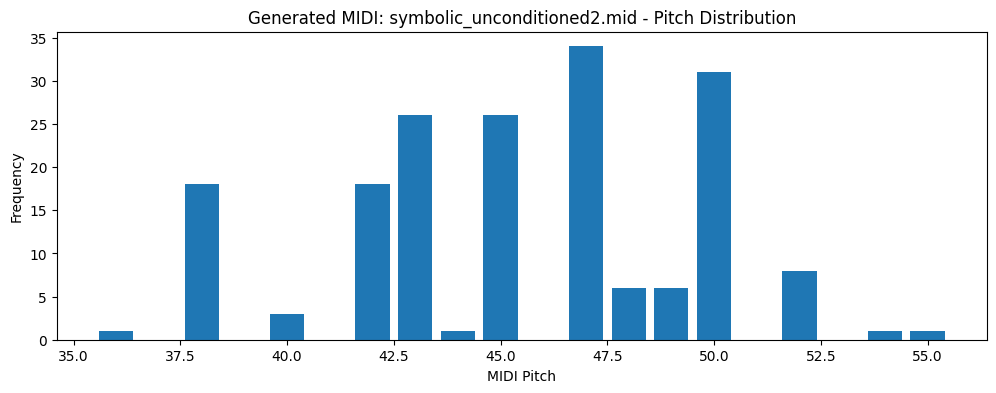

Entropy (pitch diversity): 3.15
Repetition rate (immediate): 1.11%


In [21]:
# Load the generated MIDI
generated_pitches = extract_pitches_from_midi("symbolic_unconditioned2.mid")

# Run evaluation
evaluate_statistics(generated_pitches, title="Generated MIDI: symbolic_unconditioned2.mid")


RANDOM SAMPLING BASELINE

This baseline randomly samples pitches from the training vocabulary.

In [11]:
def generate_random_baseline(int_to_note, num_notes=200, seed=42):
    """Generate random sequence of MIDI notes from the vocabulary."""
    np.random.seed(seed)
    vocab = list(int_to_note.values())
    generated = np.random.choice(vocab, size=num_notes)
    return generated.tolist()


First-Order Markov Model Baseline

Builds a transition matrix from training data and generates based on current note's probabilities.

In [12]:
from collections import defaultdict
import random

def build_markov_model(note_sequence):
    """Create a first-order Markov model (transition dict) from notes."""
    transitions = defaultdict(list)
    for i in range(len(note_sequence) - 1):
        curr_note = note_sequence[i]
        next_note = note_sequence[i + 1]
        transitions[curr_note].append(next_note)
    return transitions

def generate_markov_sequence(transitions, int_to_note, start_note=None, length=200):
    """Generate note sequence from a Markov model."""
    notes = list(transitions.keys())
    if not start_note:
        start_note = random.choice(notes)
    
    result = [start_note]
    for _ in range(length - 1):
        next_candidates = transitions.get(result[-1], notes)
        next_note = random.choice(next_candidates)
        result.append(next_note)
    return result


In [13]:
import pretty_midi

def save_notes_to_midi(notes, output_path="baseline.mid", tempo=120):
    """Convert a list of MIDI pitches to a .mid file using PrettyMIDI."""
    midi = pretty_midi.PrettyMIDI(initial_tempo=tempo)
    piano = pretty_midi.Instrument(program=0)

    current_time = 0.0
    duration = 0.5  # Default note length in seconds

    for pitch in notes:
        try:
            note = pretty_midi.Note(
                velocity=80,
                pitch=int(pitch),
                start=current_time,
                end=current_time + duration
            )
            piano.notes.append(note)
            current_time += duration
        except Exception as e:
            print(f"⚠️ Skipping pitch {pitch}: {e}")

    midi.instruments.append(piano)
    midi.write(output_path)
    print(f"✅ Saved MIDI to: {output_path}")


In [18]:
# Step 1: Recreate class with same config
midi_lstm = LightweightMidiLSTM(
    sequence_length=25,
    embedding_dim=64,
    lstm_units=128,
    dropout_rate=0.2,
    max_notes=500
)

# Step 2: Load saved vocab data FIRST
import pickle
with open("lightweight_midi_lstm_data.pkl", "rb") as f:
    data = pickle.load(f)

midi_lstm.note_to_int = data["note_to_int"]
midi_lstm.int_to_note = data["int_to_note"]
midi_lstm.vocab_size = data["vocab_size"]

# Step 3: Now safely build model with known vocab size
midi_lstm.build_model()

# Step 4: Load weights
midi_lstm.model.load_weights("lightweight_midi_lstm.h5")

print("✅ Reinitialized LSTM model with saved weights and vocab.")


Lightweight model built successfully!
Total parameters: 112,748


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 25, 64)         │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 44)             │         2,860 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,748 (440.42 KB)

 Trainable params: 112,748 (440.42 KB)

 Non-trainable params: 0 (0.00 B)

None
✅ Reinitialized LSTM model with saved weights and vocab.


Processing MIDI files...
Using random sample of 30 files for faster training
Found 30 MIDI files
Processed 10/30 files
Processed 20/30 files
Processed 30/30 files
Extracted 9157 notes from 30 files
Vocabulary size: 47 (MIDI range: 36-84)
🎵 Evaluating Random Baseline
Pitch Range: 36 to 84


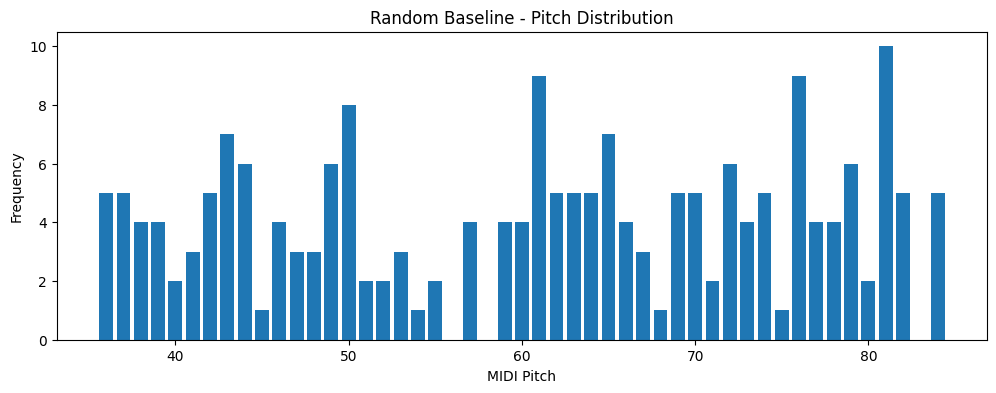

Entropy (pitch diversity): 5.35
Repetition rate (immediate): 3.00%
🎵 Evaluating Markov Baseline
Pitch Range: 0 to 45


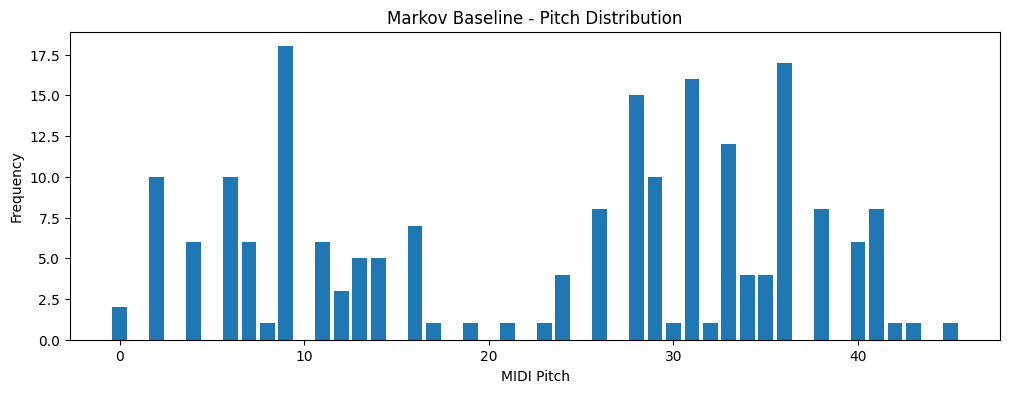

Entropy (pitch diversity): 4.56
Repetition rate (immediate): 13.50%


In [19]:
# === Get data from training ===
notes = midi_lstm.preprocess_midi_files("nottingham-dataset/MIDI", max_files=30)
filtered_notes = midi_lstm.create_vocabulary(notes)
note_ints = [midi_lstm.note_to_int[n] for n in filtered_notes if n in midi_lstm.note_to_int]
int_to_note = midi_lstm.int_to_note

# === Run baselines ===
random_notes = generate_random_baseline(int_to_note, num_notes=200)
markov_model = build_markov_model(note_ints)
markov_notes = generate_markov_sequence(markov_model, int_to_note, start_note=note_ints[0], length=200)

# === Evaluate each ===
evaluate_statistics(random_notes, title="Random Baseline")
evaluate_statistics(markov_notes, title="Markov Baseline")


In [20]:
# Save Random Baseline
save_notes_to_midi(random_notes, output_path="random_baseline.mid")

# Save Markov Baseline
save_notes_to_midi(markov_notes, output_path="markov_baseline.mid")


✅ Saved MIDI to: random_baseline.mid
✅ Saved MIDI to: markov_baseline.mid
